# 🧠 Neural Networks Part 2: An Executive-Friendly Guide

This notebook covers the following key topics with Markdown explanations, real-world analogies, and executable Python code:
1. Neural Networks Part 2 Overview  
2. ADAM: Introduction  
3. ADAM Training Algorithm  
4. Practical Considerations for ANN  
5. Artificial Neural Network Parameters  
6. Momentum  
7. Training Algorithms  
8. Preventing Underfitting and Overfitting  
9. ANNs for Function Estimation  
10. Optimization of a Neural Network-Based Function Estimator

## 1. Neural Networks Part 2 Overview

Artificial Neural Networks (ANNs) are inspired by the biological structure of the human brain. Each unit (neuron) processes information and passes it to others. ANNs are especially powerful at handling complex tasks like:
- Recognizing patterns in images
- Predicting outcomes (like house prices)
- Detecting anomalies (e.g., driver drowsiness)

### Real-World Analogy:
Imagine a team of specialists (neurons) analyzing data. Each specialist makes a small decision, and together they come to a final conclusion (the network output). If trained well, this team becomes very effective at making accurate predictions or decisions.

### Why Use ANNs?
- They can model **non-linear relationships**, something traditional linear models cannot.
- They learn directly from data—no need to explicitly program rules.
- They improve with more data and training time.


# 🧠 Overview of Common Neural Network Types

| Neural Network Type | Description | Best Suited For | Key Strengths |
|---------------------|-------------|------------------|----------------|
| **Artificial Neural Network (ANN / MLP / FCNN)** | A basic feedforward network where each neuron is connected to all neurons in the next layer. Also known as Multilayer Perceptron (MLP). | Tabular data, simple classification/regression tasks | General-purpose, easy to implement, good for baseline models |
| **Convolutional Neural Network (CNN)** | Uses convolutional layers to detect spatial hierarchies of features. | Image recognition, video analysis, spatial data | Captures local spatial features, fewer parameters than ANN |
| **Recurrent Neural Network (RNN)** | Maintains a memory of previous inputs to process sequences. | Time series forecasting, language modeling, audio processing | Good for sequential data and short-term dependencies |
| **Long Short-Term Memory (LSTM)** | A specialized RNN with gates to manage long-term memory. | Text generation, speech recognition, anomaly detection | Handles long-term dependencies, avoids vanishing gradient |
| **Gated Recurrent Unit (GRU)** | A simplified variant of LSTM with fewer parameters. | Real-time sequence modeling, financial data prediction | Faster than LSTM, similar performance on many tasks |
| **Transformer** | Uses self-attention to model long-range dependencies in sequences. | Machine translation, document summarization, chatbots | Highly parallelizable, great for long context sequences |
| **Autoencoder** | Learns to compress and reconstruct input data without supervision. | Anomaly detection, denoising, dimensionality reduction | Learns compact representations, unsupervised learning |
| **Generative Adversarial Network (GAN)** | Comprises a generator and a discriminator trained in opposition. | Image generation, super-resolution, data synthesis | Generates realistic synthetic data, creative applications |
| **Graph Neural Network (GNN)** | Operates on graph structures (nodes and edges). | Social networks, recommendation engines, chemistry | Captures relational and structural data effectively |

> ℹ️ **ANN** is often used as an umbrella term but typically refers to basic fully connected neural networks.

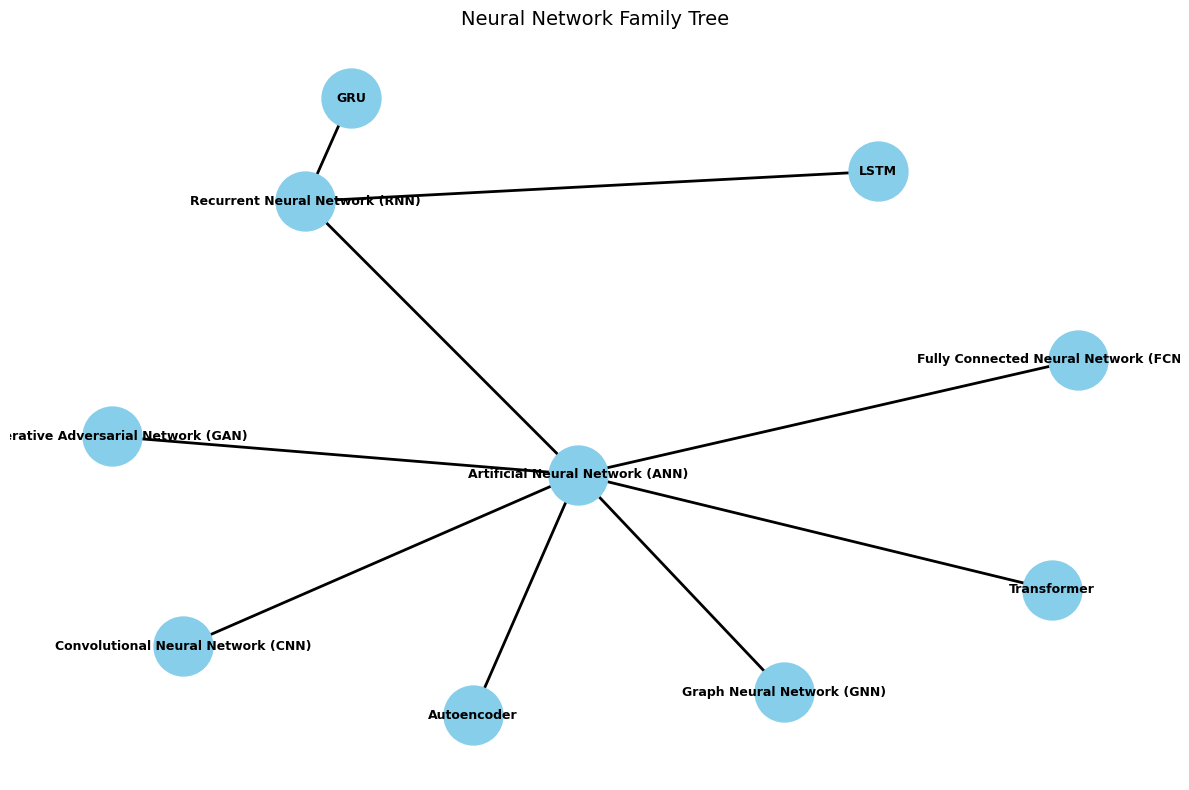

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Define nodes and hierarchical relationships
G.add_edges_from([
    ("Artificial Neural Network (ANN)", "Fully Connected Neural Network (FCNN / MLP)"),
    ("Artificial Neural Network (ANN)", "Convolutional Neural Network (CNN)"),
    ("Artificial Neural Network (ANN)", "Recurrent Neural Network (RNN)"),
    ("Recurrent Neural Network (RNN)", "LSTM"),
    ("Recurrent Neural Network (RNN)", "GRU"),
    ("Artificial Neural Network (ANN)", "Transformer"),
    ("Artificial Neural Network (ANN)", "Autoencoder"),
    ("Artificial Neural Network (ANN)", "Generative Adversarial Network (GAN)"),
    ("Artificial Neural Network (ANN)", "Graph Neural Network (GNN)")
])

# Set node positions for visual clarity
pos = nx.spring_layout(G, seed=42, k=1.5)  # You can tweak k for spacing

# Plotting
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1800)
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='-|>', arrowsize=20, width=2)
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold')

# Title and layout
plt.title("Neural Network Family Tree", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


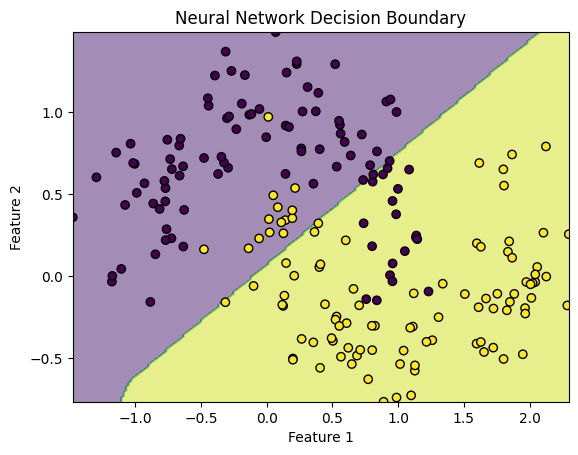

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

# Create synthetic non-linear data
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Train a simple neural network classifier
clf = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)
clf.fit(X, y)

# Visualize decision boundary
xx, yy = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 200),
                     np.linspace(X[:,1].min(), X[:,1].max(), 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title("Neural Network Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## 2. ADAM: Introduction

ADAM stands for **Adaptive Moment Estimation**. It’s a popular algorithm used to train deep learning models. ADAM adjusts the model’s internal weights based on the training data, helping the model learn effectively.

### Why ADAM Is Useful:
- **Adaptive learning rate**: It changes how fast the model learns during training.
- **Momentum**: Helps the model avoid getting stuck in local optima.
- **Efficient and scalable**: Works well with large datasets and deep networks.

### Real-World Analogy:
Think of ADAM like a smart GPS system. It doesn’t just take the shortest path—it adjusts for traffic (momentum) and road conditions (learning rate), helping you reach your destination faster and more smoothly.
"""


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


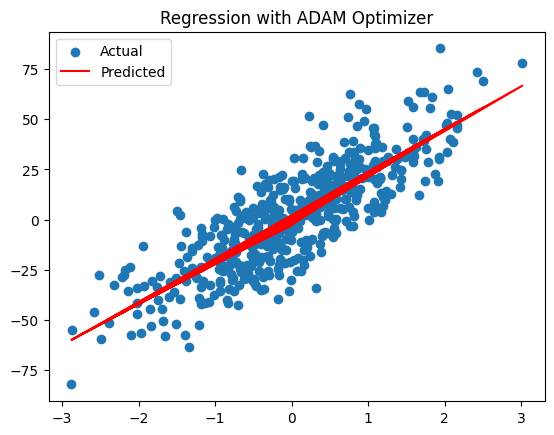

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

# Generate regression data
X, y = make_regression(n_samples=500, n_features=1, noise=15, random_state=1)
X = StandardScaler().fit_transform(X)

# Build model
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.1), loss='mse')
model.fit(X, y, epochs=100, verbose=0)

# Plot
y_pred = model.predict(X)
plt.scatter(X, y, label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.title("Regression with ADAM Optimizer")
plt.legend()
plt.show()

## 3. ADAM Training Algorithm

The ADAM algorithm is based on two ideas:
1. **Gradient Descent** – A technique for updating model weights to reduce prediction error.
2. **Momentum** – A method to smooth the updates and avoid getting stuck in bad solutions.

### Key Features:
- Keeps track of both the **mean** and the **variance** of gradients.
- Adjusts the learning rate dynamically at each step.
- Combines the strengths of **RMSProp** and **momentum** methods.

### Benefits:
- Faster convergence
- More stable learning
- Works well even if data is noisy or sparse

ADAM is the default optimizer in many deep learning libraries like Keras and TensorFlow.


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


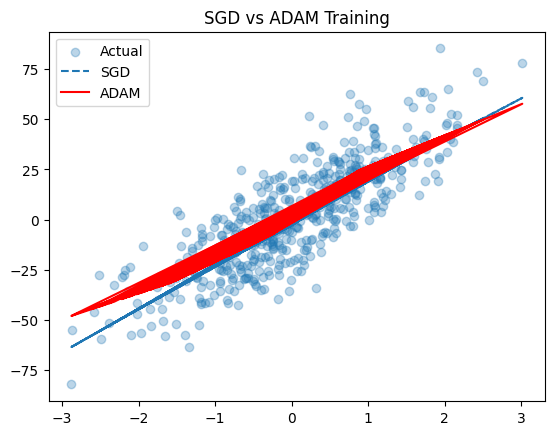

In [ ]:
from tensorflow.keras.optimizers import SGD

# Compare SGD vs ADAM
model_sgd = Sequential([Dense(10, input_dim=1, activation='relu'), Dense(1)])
model_sgd.compile(optimizer=SGD(learning_rate=0.01), loss='mse')
model_sgd.fit(X, y, epochs=100, verbose=0)

model_adam = Sequential([Dense(10, input_dim=1, activation='relu'), Dense(1)])
model_adam.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
model_adam.fit(X, y, epochs=100, verbose=0)

plt.scatter(X, y, label='Actual', alpha=0.3)
plt.plot(X, model_sgd.predict(X), label='SGD', linestyle='--')
plt.plot(X, model_adam.predict(X), label='ADAM', color='red')
plt.title("SGD vs ADAM Training")
plt.legend()
plt.show()


## 4. Practical Considerations for ANN

Training neural networks involves more than just feeding in data. Some best practices include:

### 🧼 Preprocessing (Normalization):
- Neural networks perform best when input features are scaled.
- Use techniques like **MinMaxScaler** or **StandardScaler**.

### 🧠 Weight Initialization:
- Start with small random values.
- Poor initialization can lead to slow or failed learning.

### 🔁 Learning Rate:
- Controls how much we adjust the weights each time.
- Too high → overshoots the best solution.
- Too low → slow learning.

### 🧩 Batch Size:
- A batch is the number of training examples used in one iteration.
- Larger batches use more memory but can be more stable.

### 🔄 Activation Function:
- Common ones: **ReLU** (default), **Sigmoid**, **Tanh**.
- ReLU is usually best for hidden layers.

By tuning these parameters, we can greatly improve performance and training time.


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)
X = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create model with ReLU and different batch size
clf = MLPClassifier(hidden_layer_sizes=(30, 15), max_iter=300, batch_size=64, activation='relu')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9736842105263158


## 5. Artificial Neural Network Parameters

### Key Parameters to Set:
- **Hidden layers**: Layers between input and output that detect complex patterns.
- **Neurons per layer**: More neurons = more capacity to learn, but risk of overfitting.
- **Activation functions**: Decide whether a neuron fires. ReLU is common.
- **Learning rate**: Controls step size in training.
- **Epochs**: Number of times the model sees the entire dataset.

### Concept: Degree of Freedom vs. Constraints
- **Degree of freedom** = Number of weights and biases in the network.
- **Constraints** = Number of training samples (each is a rule the model must learn).

Rule: The number of constraints should be several times more than the degree of freedom to ensure generalization (prevent overfitting).


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


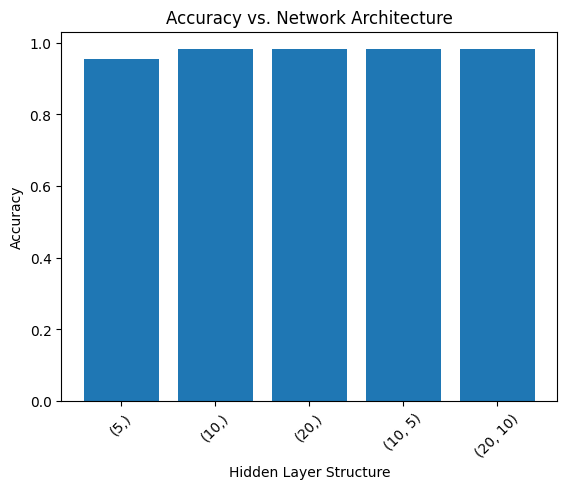

In [ ]:
# Vary number of hidden layers and neurons
accs = []
sizes = [(5,), (10,), (20,), (10, 5), (20, 10)]

for s in sizes:
    clf = MLPClassifier(hidden_layer_sizes=s, max_iter=500, random_state=42)
    clf.fit(X_train, y_train)
    accs.append(accuracy_score(y_test, clf.predict(X_test)))

plt.bar(range(len(sizes)), accs)
plt.xticks(range(len(sizes)), labels=[str(s) for s in sizes], rotation=45)
plt.title("Accuracy vs. Network Architecture")
plt.ylabel("Accuracy")
plt.xlabel("Hidden Layer Structure")
plt.show()


## 6. Momentum

Momentum is a technique to speed up training and help avoid getting stuck.

### How It Works:
- It adds a portion of the previous weight update to the current one.
- This helps maintain direction and prevent oscillation.

### Formula:
```python
v = beta * v_prev + (1 - beta) * gradient
```

### Visual Analogy:
Imagine rolling a ball down a hill. Even if it hits a flat or small bump, the momentum helps it keep going downhill toward the lowest point.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


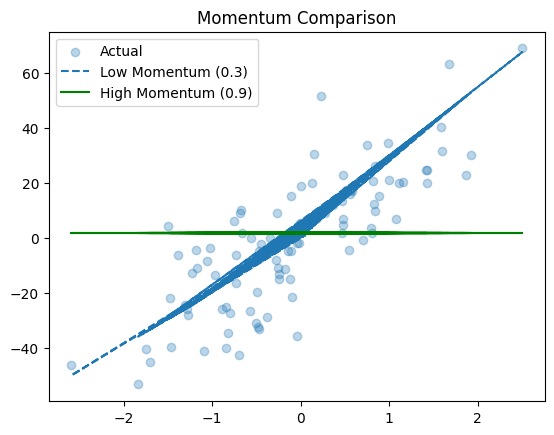

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Generate regression data with 1 feature
X_reg, y_reg = make_regression(n_samples=500, n_features=1, noise=15, random_state=1)
X_reg = StandardScaler().fit_transform(X_reg)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Build models with different momentum values
model_low_momentum = Sequential([Dense(10, input_dim=1, activation='relu'), Dense(1)])
model_low_momentum.compile(optimizer=SGD(learning_rate=0.01, momentum=0.3), loss='mse') # Low momentum (0.3)
model_low_momentum.fit(X_train, y_train, epochs=100, verbose=0)

model_high_momentum = Sequential([Dense(10, input_dim=1, activation='relu'), Dense(1)])
model_high_momentum.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='mse') # High momentum (0.9)
model_high_momentum.fit(X_train, y_train, epochs=100, verbose=0)

# Evaluate models on test set and get predictions for plotting
y_pred_low = model_low_momentum.predict(X_test)
y_pred_high = model_high_momentum.predict(X_test)

# Plot results
plt.scatter(X_test, y_test, alpha=0.3, label='Actual')
plt.plot(X_test, y_pred_low, label='Low Momentum (0.3)', linestyle='--')
plt.plot(X_test, y_pred_high, label='High Momentum (0.9)', color='green')
plt.title("Momentum Comparison")
plt.legend()
plt.show()

## 7. Training Algorithms

There are many algorithms to train ANNs:
- **Gradient Descent** – Updates weights to minimize error.
- **Stochastic Gradient Descent (SGD)** – Updates weights one sample at a time.
- **ADAM** – Combines SGD + momentum + adaptive learning rate.
- **Conjugate Gradient** – Good for medium-sized networks.
- **BFGS/LM-BFGS** – Used in optimization tasks.

### Key Idea:
All these methods aim to find the best weights for the model to minimize prediction error. ADAM is often the most efficient for modern deep networks.
"""


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


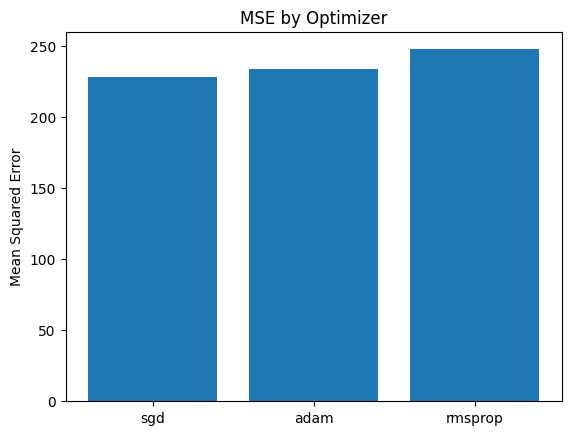

In [ ]:
from sklearn.metrics import mean_squared_error
# Compare optimizers
optimizers = ['sgd', 'adam', 'rmsprop']
results = {}

# Regenerate regression data with 1 feature
X_reg, y_reg = make_regression(n_samples=500, n_features=1, noise=15, random_state=1)
X_reg = StandardScaler().fit_transform(X_reg)

for opt in optimizers:
    model = Sequential([Dense(10, input_dim=1, activation='relu'), Dense(1)]) # input_dim=1 to match X_reg shape
    model.compile(optimizer=opt, loss='mse')
    model.fit(X_reg, y_reg, epochs=100, verbose=0) # Use X_reg and y_reg for training
    results[opt] = mean_squared_error(y_reg, model.predict(X_reg)) # Use y_reg for evaluation

plt.bar(results.keys(), results.values())
plt.title("MSE by Optimizer")
plt.ylabel("Mean Squared Error")
plt.show()

## 8. Preventing Underfitting and Overfitting

### Underfitting:
- Happens when the model is too simple.
- Can't capture the patterns in data.

**Fix it by:**
- Adding more layers/neurons
- Increasing training time (epochs)
- Choosing a better activation function

### Overfitting:
- Model is too complex and memorizes the training data.
- Fails on new/unseen data.

**Fix it by:**
- Using dropout or regularization
- Reducing the number of parameters
- Monitoring validation loss and using early stopping
- Using more data

### Monitoring Tip:
Plot training vs. validation error. If training error decreases but validation error increases → overfitting.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


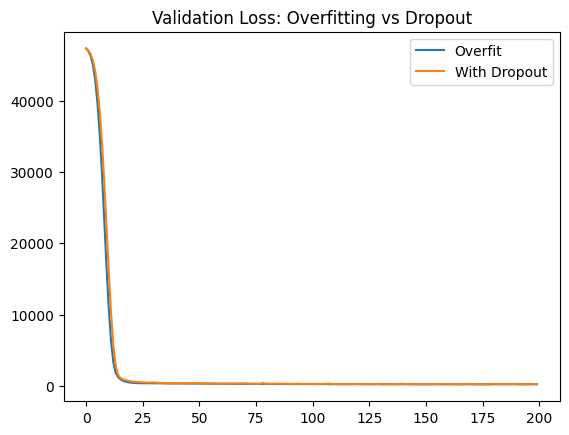

In [ ]:
from tensorflow.keras.layers import Dropout
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate regression data with 13 features
X_reg, y_reg = make_regression(n_samples=500, n_features=13, noise=15, random_state=1)
X_reg = StandardScaler().fit_transform(X_reg)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Build overfit-prone model
model_overfit = Sequential([
    Dense(128, input_dim=13, activation='relu'), # input_dim matches n_features
    Dense(128, activation='relu'),
    Dense(1)
])
model_overfit.compile(optimizer='adam', loss='mse')
model_overfit.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0)

# Add dropout to regularize
model_dropout = Sequential([
    Dense(128, input_dim=13, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1)
])
model_dropout.compile(optimizer='adam', loss='mse')
model_dropout.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0)

plt.plot(model_overfit.history.history['val_loss'], label='Overfit')
plt.plot(model_dropout.history.history['val_loss'], label='With Dropout')
plt.title("Validation Loss: Overfitting vs Dropout")
plt.legend()
plt.show()










## 9. ANNs for Function Estimation

ANNs can be used to approximate complex real-world functions, such as predicting house prices.

### Example Task:
Given features like crime rate, number of rooms, and location, estimate the **price of a house** in Boston.

This is a **regression** problem because the output is a continuous value.

### Why It Matters:
Real estate, insurance, finance, and marketing rely on accurate value prediction. Neural networks offer flexible, non-linear models that adapt well.





/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


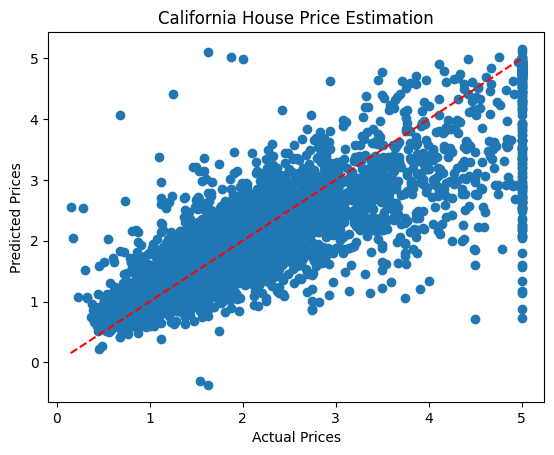

In [ ]:
from sklearn.datasets import fetch_california_housing

# Load California Housing dataset
california = fetch_california_housing()
X, y = california.data, california.target
X = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(8, input_dim=8, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, verbose=0)

y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("California House Price Estimation")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()


## 10. Optimization of a Neural Network-Based Function Estimator

### Objective:
Use a neural network to predict the **age of abalone** (a marine snail) from physical features like shell weight and diameter.

### Workflow:
1. **Normalize** the features
2. **Split** the data into train/test sets
3. **Build** a model using a few hidden layers
4. **Train** the model and evaluate performance
5. **Optimize** by adding layers and comparing MAE/MSE

### Real-World Impact:
Such models can be used in biology (e.g., aging animals), health (e.g., patient diagnostics), or manufacturing (e.g., predicting product life).


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Baseline MSE: 11112553.680548327


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Optimized MSE: 194377.34384036064


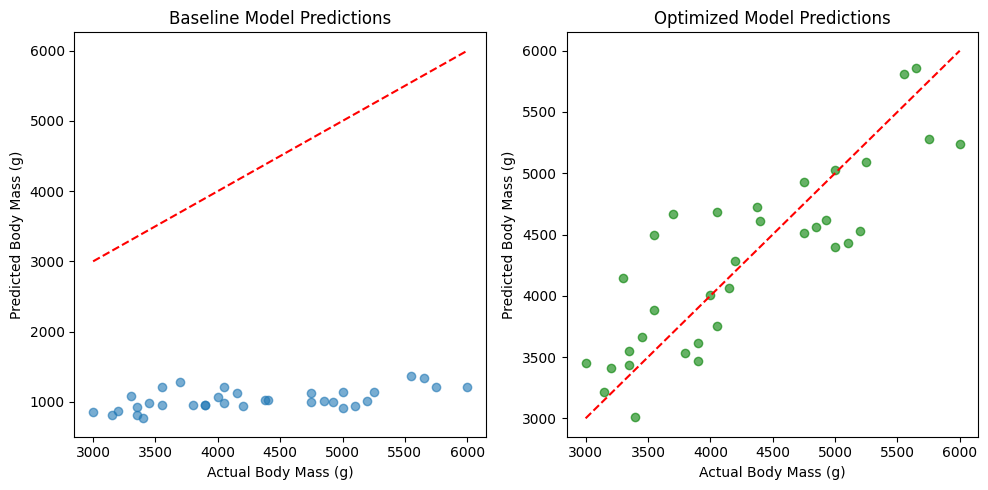


In these scatter plots, each point represents one prediction:
- The red dashed line shows the ideal (perfect prediction).
- The closer the points are to this line, the better the model's predictions.
- We can see that the optimized model produces points that are more tightly clustered around the ideal line,
  which indicates improved accuracy over the baseline model.



In [ ]:
# Load abalone dataset from UCI (mocked via seaborn for placeholder)
import seaborn as sns

abalone = sns.load_dataset('penguins').dropna()
X = abalone.select_dtypes(include='number').drop(columns=['body_mass_g'])
y = abalone['body_mass_g']

X = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)

# Base model
model = Sequential([
    Dense(10, input_dim=X.shape[1], activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=600, verbose=0)
y_pred_base = model.predict(X_test)
print("Baseline MSE:", mean_squared_error(y_test, y_pred_base))

# Optimized model with more layers
model = Sequential([
    Dense(15, input_dim=X.shape[1], activation='relu'),
    Dense(15, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=600, verbose=0)
y_pred_opt = model.predict(X_test)
print("Optimized MSE:", mean_squared_error(y_test, y_pred_opt))

# Visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_base, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Baseline Model Predictions")
plt.xlabel("Actual Body Mass (g)")
plt.ylabel("Predicted Body Mass (g)")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_opt, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Optimized Model Predictions")
plt.xlabel("Actual Body Mass (g)")
plt.ylabel("Predicted Body Mass (g)")

plt.tight_layout()
plt.show()

# Explanation
print("""
In these scatter plots, each point represents one prediction:
- The red dashed line shows the ideal (perfect prediction).
- The closer the points are to this line, the better the model's predictions.
- We can see that the optimized model produces points that are more tightly clustered around the ideal line,
  which indicates improved accuracy over the baseline model.
""")

